In [3]:
using MAT
using WebIO
using PyPlot
using Eirene
using PersistenceImage

In [4]:
allvariables = matread("experimental-data/EGF(E6)w5.mat");
allx = allvariables["storeX"];
ally = allvariables["storeY"];
allxvel = allvariables["storevelX"];
allyvel = allvariables["storevelY"];

In [5]:
timestep1x = allx[1:end,1];
timestep1y = ally[1:end,1];
timestep1x = filter!(!(isnan),timestep1x);
timestep1y = filter!(!(isnan),timestep1y);
positiontime1 = hcat(timestep1x, timestep1y)
positiontime1 = transpose(positiontime1)

2×63 LinearAlgebra.Transpose{Float64,Array{Float64,2}}:
 48.9  52.4  239.9  118.4    3.9   45.7  …  389.8  528.6  400.7  737.5  747.0
 19.2  38.2  144.8  322.3  329.8  330.6     762.0  801.7  867.7  890.6  893.4

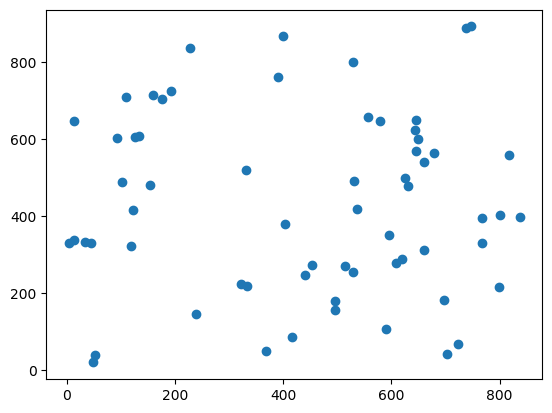

PyObject <matplotlib.collections.PathCollection object at 0x14153ed50>

In [20]:
scatter(timestep1x, timestep1y)

In [87]:
persist_diag = eirene(positiontime1, model="pc", maxdim=1)

Dict{String,Any} with 12 entries:
  "symmat"   => [1466 1309 … 0 306; 1309 1466 … 247 0; … ; 0 247 … 1466 0; 306 …
  "maxnz"    => [0, 731, 8613, 1, 0]
  "firstv"   => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  55, 56, 57, 5…
  "cyclerep" => Array{Array{Int64,1},1}[[], [[1, 6], [2, 3], [8, 10], [11, 7], …
  "phi"      => Array{Int64,1}[[], [5, 61, 397, 348, 1464, 182, 931, 1299, 1444…
  "plo"      => Array{Int64,1}[[], [6, 3, 10, 7, 60, 9, 21, 57, 53, 52  …  59, …
  "ocg2rad"  => [606.021, 605.799, 605.505, 605.428, 604.823, 604.241, 603.612,…
  "farfaces" => Array{Int64,1}[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  54, 55, 56, 5…
  "nvl2ovl"  => [29, 45, 47, 23, 28, 49, 22, 46, 20, 48  …  9, 41, 5, 61, 44, 3…
  "input"    => Dict{String,Any}("genera"=>[48.9 52.4 … 737.5 747.0; 19.2 38.2 …
  "tid"      => Array{Int64,1}[[], [6, 3, 10, 7, 60, 9, 21, 57, 53, 52  …  2, 3…
  "grain"    => Array{Int64,1}[[1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466,…

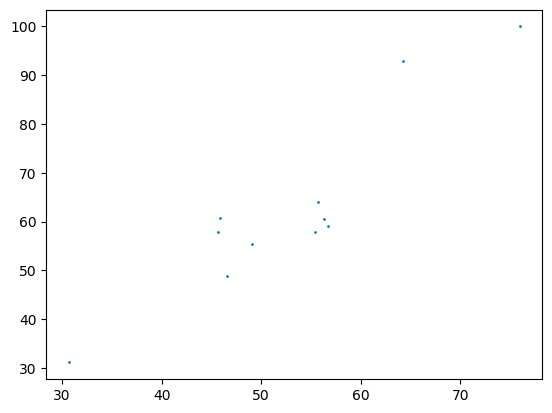

PyObject <matplotlib.collections.PathCollection object at 0x144a2b110>

In [91]:
barcode_data = barcode(persist_diag);

# normalize by maximum coordinate value
barcode_coord_vals = sort(unique(collect(Iterators.flatten(barcode_data))));
max_coord = maximum(barcode_coord_vals)
# if max value is Inf, normalize by second largest values
if max_coord == Inf
    max_coord = barcode_coord_vals[end-1]
end

@assert max_coord != Inf

# replace Inf values
replace!(barcode_data, Inf=>max_coord);

# normalize
barcode_data = barcode_data/maximum(barcode_data);

# scale
barcode_data = barcode_data * 100.0;

# plot rescaled data
scatter(barcode_data[:,1], barcode_data[:,2], s=1)

In [85]:
persimg = transformdiagram(barcode_data, pixels=(100,100), σ=0.3)

#print(persimg)
persimg_vals = sort(unique(collect(Iterators.flatten(persimg))));
persimg_vals = filter!(!(isnan), persimg_vals);

# normalize image
persimg = (persimg .- minimum(persimg_vals))./(maximum(persimg_vals)-minimum(persimg_vals))

100×100 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 ⋮                       

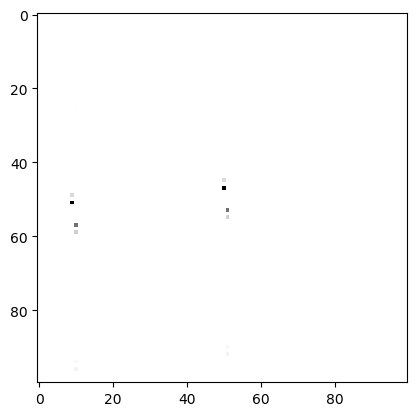

PyObject <matplotlib.image.AxesImage object at 0x1446ce610>

In [86]:
imshow(persimg, cmap="gray")